<a href="https://colab.research.google.com/github/rhysdavies21/library/blob/master/simulation_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Calculates and plots simulated random walk

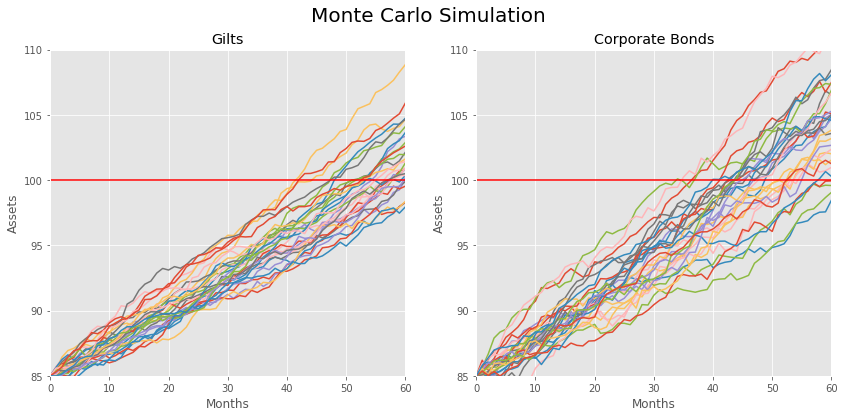

In [2]:
# Import libraries
import pandas_datareader.data as web
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import math

# Choose plot style
style.use('ggplot')

# Set diffusion parameters
last_price = 85
num_simulations = 30
num_months = 60
monthly_vol_a0 = 0.0008 * math.sqrt(12)
monthly_vol_a1 = 0.0012 * math.sqrt(12)
mew_a0 =  0.035
mew_a1 =  0.04
months_year = 12

# Initialise diffusion
simulation_df_a0 = pd.DataFrame()
simulation_df_a1 = pd.DataFrame()

# Create diffusion
for x in range(num_simulations):
  count = 0
  
  price_series_a0 = []
  price_a0 = last_price
  price_series_a0.append(price_a0)

  price_series_a1 = []
  price_a1 = last_price
  price_series_a1.append(price_a1)
  
  for y in range(num_months):
    if count == num_months:
      break
    price_a0 = price_series_a0[count] * (1+(mew_a0/months_year) + np.random.normal(0, monthly_vol_a0))
    price_series_a0.append(price_a0)
    
    price_a1 = price_series_a1[count] * (1+(mew_a1/months_year) + np.random.normal(0, monthly_vol_a1))
    price_series_a1.append(price_a1)

    count += 1

  simulation_df_a0[x] = price_series_a0
  simulation_df_a1[x] = price_series_a1
 
# Create plot
fig = plt.figure()
fig.suptitle('Monte Carlo Simulation', fontsize=20)

ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2) 

simulation_df_a0.plot(kind='line', figsize=(14, 4), ax=ax0) # add to subplot 1
simulation_df_a1.plot(kind='line', figsize=(14, 6), ax=ax1) # add to subplot 2

ax0.set_ylim(85,110)
ax0.set_title ('Gilts')
ax0.set_ylabel('Assets')
ax0.set_xlabel('Months')
ax0.get_legend().remove()
ax0.axhline(y=100, color = 'r', linestyle = '-')
ax0.set_ylim(85,110)

ax1.set_ylim(85,110)
ax1.set_title ('Corporate Bonds')
ax1.set_ylabel('Assets')
ax1.set_xlabel('Months')
ax1.get_legend().remove()
ax1.axhline(y=100, color = 'r', linestyle = '-')